## Wrangle and Analyze "WeRateDogs" Data

### Introduction 

The dataset that we will bre wrangling (and analyzind and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent". WeRateDogs as over 4 million followers and has received international media coverage. 

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to us in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

Our goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.




In [1]:
# Import the necessary libraries and modules
import pandas as pd 
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import math
import os
import seaborn as sns

### Gathering Data

First, we would like to gather the different needed files.

#### Gather : Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, used to extract rating, dog name, and dog 'stage' to make this Twitter archive 'enhanced'.

In [2]:
# Loads Twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Gather : Image Prediction

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. The file is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL : https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# Loads tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-prediction.tsv', 'wb') as file :
    file.write(response.content)
    
df_image = pd.read_csv('image-prediction.tsv', sep = '\t')

#### Gather : Twitter API Data
Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [4]:
# Loads Twitter API data
with open ('tweet-json.txt') as f : 
    df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

df_api.columns = ['tweet_id', 'favorites', 'retweets']

### Assessing Data

Then, we would like to assess the loaded dataset individually. The three datasets are : 
- df_archive ; 
- df_image ;
- df_api.

#### Assess : Twitter Archive

In [5]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
# Observes if ids are uniques
df_archive.index.is_unique

True

In [9]:
# Observes the number of replies
np.isfinite(df_archive.in_reply_to_status_id).sum()

78

In [10]:
# Observes the number of retweets
np.isfinite(df_archive.retweeted_status_id).sum()

181

In [11]:
# Counts dog names
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Link           1
Shnuggles      1
Vinscent       1
Devón          1
Cermet         1
Name: name, Length: 957, dtype: int64

In [12]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
# Observes rating denominator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# Observes rating numerator
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# Observes rating denominator outliers (!= 10)
pd.set_option('display.max_colwidth', -1)
df_archive[df_archive.rating_denominator != 10][['text', 'rating_denominator']]

C:\Users\macbi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [19]:
# Observes rating numerator outliers (> 20)
df_archive[df_archive.rating_numerator > 20][['text', 'rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


##### Quality & Tidiness issues in df_archive
- A number of numerators and denominators do not comply with the rules laid down ; 
- We can observe that dogo stage is splitted in 4 columns (doggo, floofer, pupper, puppo), an unique column seems to be more relevant ; 
- Some denominators are greater than 10, which is not in accordance with the scoring rules ; 
- We can observe 745 'None' entries and 55 'a' entries in the colume name. We can also observe different invalid names that contain less than three characters and start with lower letter ;
- Columns numerator and denominator expresses the same observation, i.e. the rating ; 
- A number of numerators are overvalued and have outliers.

#### Assess : Image Prediction

In [20]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [22]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Observes jpg_url for duplicates
df_image.jpg_url.duplicated().sum()

66

In [24]:
# Observes jpg_url format
df_image[~df_image.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [25]:
# Observes p1 predictions
df_image['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

p1 is the first algorithm prediction for images in tweets. p1_conf is the confidence level of the algorithm. p1_dog is whether or not the first prediction is a breed of dog.

In [26]:
# Observes p2 predictions
df_image['p2_dog'].value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

p2 is the second algorithm prediction for images in tweets. p2_conf is the confidence level of the algorithm. p2_dog is whether or not the second prediction is a breed of dog.

In [27]:
# Observes p3 predictions
df_image['p3_dog'].value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

p3 is the third algorithm prediction for images in tweets. p3_conf is the confidence level of the algorithm. p3_dog is whether or not the third prediction is a breed of dog.

##### Quality & Tidiness issues in df_image
- df_archive counts 2356 entries while df_image counts 2075 entries, we can observe a mismatch with missing entries ;
- We can find 66 jpg_url duplicates ; 
- 1532 images have been classified true as dog images in p1 predictions, 1553 have been classified true as dog images in p2 predictions, 1499 have been classified true as dog images in p3 predictions.


#### Assess : Twitter API Data

In [28]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
df_api.head(3)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


In [30]:
df_api.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [31]:
df_api.index.is_unique

True

##### Quality & Tidiness issues in df_api
- df_archive counts 2356 entries while df_api counts 2354 entries, we can observe a mismatch with missing entries ;
- Apart from the mismatch of the number of entries, the three datasets seem to be linked and can be merged into one single ; 
- A number of tweets are present several times within the three datasets. Since only original tweets are to be considered for the project, these duplicate tweets will have to be purged.

#### General insights with quality and tidiness issues

##### Quality issues for the three datasets
- In df_image, 1532 images have been classified true as dog images in p1 predictions, 1553 have been classified true as dog images in p2 predictions, 1499 have been classified true as dog images in p3 predictions ;
- We can find 66 jpg_url duplicates in df_image ; 
- A number of numerators and denominators do not comply with the rules laid down in df_archive ;
- Some denominators are greater than 10, which is not in accordance with the scoring rules in df_archive ; 
- In df_archive, we can observe 745 'None' entries and 55 'a' entries in the colume name. We can also observe different invalid names that contain less than three characters and start with lower letter ;
- In df_archive, columns numerator and denominator expresses the same observation, i.e. the rating ; 
- A number of numerators are overvalued and have outliers in df_archive.

##### Tidiness issues for the three datasets
- Mismatch of entries between the three datasets ;
- Informations about tweets are separated between the three datasets, we need to merge into one ;
- Duplicated tweets need to be remove from df_api ; 
- In df_archive, we can observe that dogo stage is splitted in 4 columns (doggo, floofer, pupper, puppo), an unique column seems to be more relevant.

### Cleaning Data

Thereafter, we need to clean and merge the three dataset.

In [32]:
# Creates copies of the three datasets
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_api_clean = df_api.copy()

#### Clean : Twitter Archive

**Define**

There are erroneous dog names in the name column. These are all lowercase and will be replaced with 'None' and then with NaN value.

**Code**

In [33]:
# Drop null values for retweets
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

In [34]:
# Replaces the differents error names in the name column
lowercase = []
for row in df_archive_clean['name'] :
    if row[0].islower() and row not in lowercase : 
        lowercase.append(row)
print(lowercase)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [35]:
# Replaces name to None and then to NaN 
df_archive_clean.name = df_archive_clean.name.str.replace('^[a-z]+', 'None')
df_archive_clean.name.replace('None', np.nan, inplace = True)

**Test**

In [36]:
df_archive_clean.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny       9 
           .. 
Hall        1 
Eve         1 
Heinrich    1 
Skittle     1 
Dixie       1 
Name: name, Length: 930, dtype: int64

**Define**

We would like to turn timestamp into datetime format.

**Code**

In [37]:
# Converts timestamp to datetime format
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp, format = '%Y-%m-%d %H:%M:%S.%f')

**Test**

In [38]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

**Define** 

We would like to compute rating for each dogs with numerator and denominator columns, and then drop these columns.

**Code**

In [39]:
# Creates new column rating by calculating numerator/denominator and drop columns/outliers
df_archive_clean['rating'] = df_archive_clean['rating_numerator']/df_archive_clean['rating_denominator']
df_archive_clean = df_archive_clean.query('rating > 1 and rating < 1.5')
df_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

**Test**

In [40]:
df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2


**Define**

We would like to merged doggo, pupper, puppo and floofer columns into one. 

**Code**

In [48]:
# Removes 'None' and '' entries in the columns doggo, pupper, puppo and floofer
df_archive_clean.doggo.replace('None', '', inplace = True)
df_archive_clean.floofer.replace('None', '', inplace = True)
df_archive_clean.pupper.replace('None', '', inplace = True)
df_archive_clean.puppo.replace('None', '', inplace = True)

In [50]:
# Merges dog classification into one column and drop old ones
df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

In [51]:
df_archive_clean.dog_stage.value_counts()

                1052
pupper          132 
doggo           64  
puppo           20  
floofer         8   
doggopupper     8   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

In [52]:
# Removes errors values and replace '' missing dog_stage with 'No doggo' 
df_archive_clean.dog_stage.replace('doggopupper', '', inplace = True)
df_archive_clean.dog_stage.replace('doggopuppo', '', inplace = True)
df_archive_clean.dog_stage.replace('doggofloofer', '', inplace = True)
df_archive_clean.dog_stage.replace('', 'No doggo', inplace = True)

In [53]:
# Removes olds columns 'doggo', 'floofer', 'pupper' and 'puppo'
df_archive_clean.drop('doggo', axis = 1, inplace = True)
df_archive_clean.drop('floofer', axis = 1, inplace = True)
df_archive_clean.drop('pupper', axis = 1, inplace = True)
df_archive_clean.drop('puppo', axis = 1, inplace = True)

**Test**

In [54]:
df_archive_clean.dog_stage.value_counts()

No doggo    1062
pupper      132 
doggo       64  
puppo       20  
floofer     8   
Name: dog_stage, dtype: int64

In [55]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 2339
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1286 non-null   int64              
 1   in_reply_to_status_id       53 non-null     float64            
 2   in_reply_to_user_id         53 non-null     float64            
 3   timestamp                   1286 non-null   datetime64[ns, UTC]
 4   source                      1286 non-null   object             
 5   text                        1286 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1251 non-null   object             
 10  name                        854 non-null    object          

#### Clean : Image Prediction

**Define**

We need to clear duplicates from jpg_url column.

**Code**

In [56]:
df_image_clean = df_image_clean.drop_duplicates(subset = ['jpg_url'], keep = 'first')

**Test**

In [57]:
df_image_clean.jpg_url.value_counts()

https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg    1
https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg    1
https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg    1
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg    1
https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg    1
                                                  ..
https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg    1
https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg    1
https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg    1
https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg    1
https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [58]:
df_image_clean.jpg_url.duplicated().sum()

0

There's nothing else to clean up here except merging the three datasets via the tweet_id column.

#### Clean : Twitter API Data
There's nothing to clean up here except merging the three datasets via the tweet_id column.

In [59]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Merging and Storing Data

We would like to merge the three datasets using the tweet_id column in one dataset.

In [60]:
# Merges the three datasets
df_merged = pd.merge(df_archive_clean, df_image_clean, on = 'tweet_id', how = 'left')
df_clean = pd.merge(df_merged, df_api_clean, on = 'tweet_id', how = 'left')

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1285
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1286 non-null   int64              
 1   in_reply_to_status_id       53 non-null     float64            
 2   in_reply_to_user_id         53 non-null     float64            
 3   timestamp                   1286 non-null   datetime64[ns, UTC]
 4   source                      1286 non-null   object             
 5   text                        1286 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1251 non-null   object             
 10  name                        854 non-null    object          

In [62]:
# Stores the final dataset in a CSV file
df_clean.to_csv('twitter_archive_master.csv', index = False)

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1285
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1286 non-null   int64              
 1   in_reply_to_status_id       53 non-null     float64            
 2   in_reply_to_user_id         53 non-null     float64            
 3   timestamp                   1286 non-null   datetime64[ns, UTC]
 4   source                      1286 non-null   object             
 5   text                        1286 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1251 non-null   object             
 10  name                        854 non-null    object          

### Analyzing and Visualizing Data

In [64]:
# Observes clean dataset 
df_clean.name.value_counts()

Charlie    9
Tucker     8
Oliver     8
Cooper     8
Lucy       7
          ..
Charles    1
Brooks     1
Derby      1
Amélie     1
Dixie      1
Name: name, Length: 618, dtype: int64

In [65]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,1.286000e+03,5.300000e+01,5.300000e+01,0.0,0.0,1286.000000,1152.000000,1152.000000,1152.000000,1.152000e+03,1286.000000,1286.000000
mean,7.646810e+17,7.431445e+17,1.378312e+16,NaN,NaN,1.197084,1.283854,0.618969,0.134138,5.883129e-02,12379.650078,3788.786936
std,6.957330e+16,7.291415e+16,1.003426e+17,NaN,NaN,0.084114,0.659212,0.266810,0.101330,5.196663e-02,13985.822942,5517.267246
min,6.661022e+17,6.658147e+17,1.185634e+07,NaN,NaN,1.100000,1.000000,0.059033,0.000010,5.595040e-07,52.000000,2.000000
25%,6.965881e+17,6.754971e+17,3.589728e+08,NaN,NaN,1.100000,1.000000,0.384126,0.049918,1.278505e-02,3291.500000,1040.750000
50%,7.621761e+17,7.079801e+17,4.196984e+09,NaN,NaN,1.200000,1.000000,0.626194,0.117062,4.639785e-02,8096.000000,2265.500000
75%,8.243185e+17,8.116272e+17,4.196984e+09,NaN,NaN,1.300000,1.000000,0.868863,0.196549,9.294430e-02,16902.750000,4415.250000
max,8.924206e+17,8.862664e+17,7.305050e+17,NaN,NaN,1.400000,4.000000,0.999984,0.467678,2.710420e-01,132810.000000,79515.000000


In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1285
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1286 non-null   int64              
 1   in_reply_to_status_id       53 non-null     float64            
 2   in_reply_to_user_id         53 non-null     float64            
 3   timestamp                   1286 non-null   datetime64[ns, UTC]
 4   source                      1286 non-null   object             
 5   text                        1286 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1251 non-null   object             
 10  name                        854 non-null    object          

In [67]:
df_clean.groupby('source')['tweet_id'].count()

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     16  
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1192
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        71  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    7   
Name: tweet_id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001858FD39F88>,
      dtype=object)

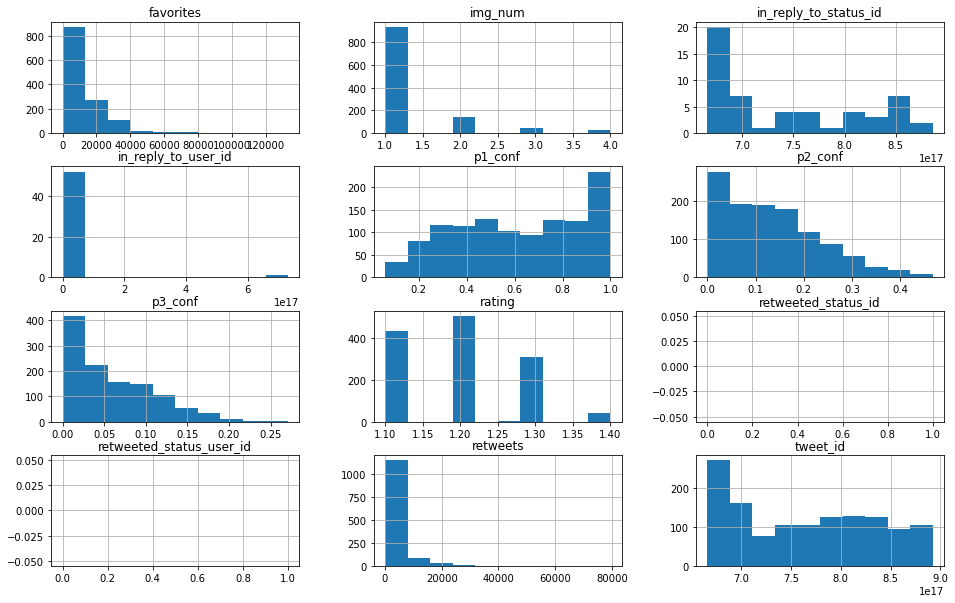

In [68]:
# Plots histogram of the full merged dataset
df_clean.hist(figsize = (16, 10))

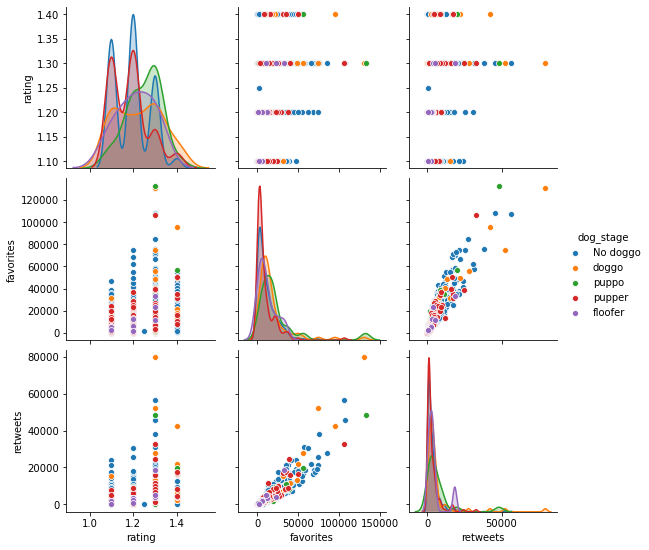

In [69]:
# Plots of ratings, favorites and retweets opposed to 'dog_stage'
sns.pairplot(df_clean[['dog_stage', 'rating', 'favorites', 'retweets']], hue = 'dog_stage')

(-10366.853980139342, 150000.0)

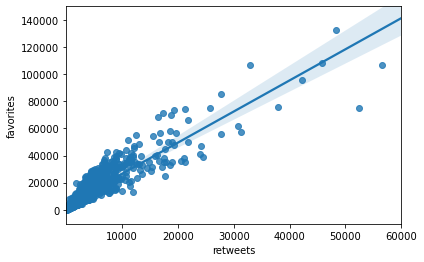

In [70]:
# Linear regression between retweets and favorites
sns.regplot(data = df_clean, x = 'retweets', y = 'favorites')
plt.xlim(xmax = 60000)
plt.ylim(ymax = 150000)

In [71]:
corr1 = df_clean['retweets'].corr(df_clean['favorites'])
print('The correlation between retweets count and favorites count is :', corr1)

The correlation between retweets count and favorites count is : 0.9047080632667436


We can observe a strong correlation between retweets count and favorites counts.

In [72]:
# Counts tweets with the differents doggo categories
df_clean.dog_stage.value_counts()

No doggo    1062
pupper      132 
doggo       64  
puppo       20  
floofer     8   
Name: dog_stage, dtype: int64

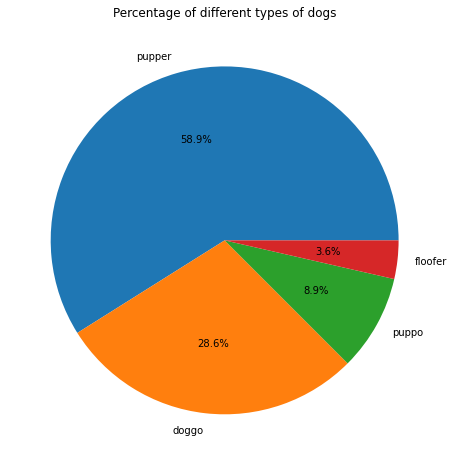

In [73]:
# Observes the distribution of doggo categories
df_clean.query('dog_stage != "No doggo"').dog_stage.value_counts().plot.pie(autopct = '%1.1f%%', figsize = (8, 8))
plt.title('Percentage of different types of dogs')
plt.ylabel('')
plt.show()

We can observe that pupper category is way more present than others (58.9%). The second category is doggo with 28.6%.

In [74]:
# Most popular names
df_clean.name.value_counts()

Charlie    9
Tucker     8
Oliver     8
Cooper     8
Lucy       7
          ..
Charles    1
Brooks     1
Derby      1
Amélie     1
Dixie      1
Name: name, Length: 618, dtype: int64

Text(0, 0.5, 'Count')

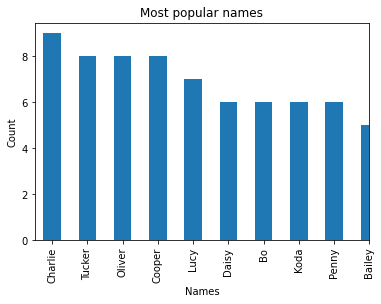

In [75]:
# Plots the 10 most popular names in the merged dataset
df_clean.name.value_counts().plot(kind = 'bar')
plt.title('Most popular names')
plt.xlabel('Names')
plt.xlim(xmax = 9)
plt.ylabel('Count')

The 10 most popular names in the dataset are : 
1. Charlie
2. Cooper
3. Oliver
4. Tucker
5. Lucy
6. Koda
7. Daisy
8. Bo
9. Penny
10. Lola

### Ressources
- https://medium.com/analytics-vidhya/introduction-to-data-wrangling-88c1b5e747cb
- https://towardsdatascience.com/data-wrangling-using-pandas-library-ae26f8bbbdd2
- https://www.sciencedirect.com/science/article/pii/S2405896315001986
- https://github.com/ayushiverma38/Project-7--Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
- https://github.com/moosial/WrangleAndAnalyzeData/blob/master/wrangle_act.ipynb
- https://github.com/LeopoldWalther/DataWrangleAndAnalyze_TwitterAccountWeRateDogs/blob/master/wrangle_act.ipynb
- https://github.com/mdrahama/Project--Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
- https://github.com/robertgv/Wrangle_and_Analyze_Data/blob/master/wrangle_act.ipynb
- https://github.com/Tesers/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
- https://github.com/Kyungjin-Cho/Udacity-Nanodegree-DataAnalysis-4th/blob/master/wrangle_act.ipynb